In [296]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 52EE-02DC

 Directory of c:\Users\khanh\AppData\Local\Programs\Microsoft VS Code\masalytics

24/11/2025  03:32 PM    <DIR>          .
10/12/2025  10:37 AM    <DIR>          ..
24/11/2025  03:21 PM             4,895 .gitignore
24/11/2025  03:21 PM    <DIR>          data
09/12/2025  09:07 PM           976,872 DataExploration.ipynb
24/11/2025  03:21 PM             3,372 README.md
               3 File(s)        985,139 bytes
               3 Dir(s)  103,732,129,792 bytes free


In [276]:
import sqlite3
import pandas as pd
import json
import datetime as dt

In [277]:
conn = sqlite3.connect('data/numero_data.sqlite')
cursor = conn.cursor()

In [278]:
df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;", conn)
df

,name
0,film_metadata
1,indian_titles
2,sales_raw_data


In [297]:
df_raw = pd.read_sql(
    "SELECT numero_film_id, raw_json FROM sales_raw_data;",
    conn
)

print("df_raw shape:", df_raw.shape)
df_raw.head()

df_raw shape: (100, 2)


,numero_film_id,raw_json
0,48137,"{""2025-02-20"": {""rows"": [{""boxOffice"": {""day1""..."
1,63815,"{""2025-05-22"": {""rows"": [{""boxOffice"": {""day1""..."
2,64826,"{""2025-03-13"": {""rows"": [{""boxOffice"": {""day1""..."
3,66112,"{""2025-04-10"": {""rows"": [{""boxOffice"": {""day1""..."
4,68343,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."


In [298]:
tables = ['film_metadata', 'sales_raw_data', 'indian_titles']
tables

['film_metadata', 'sales_raw_data', 'indian_titles']

Now move to the step of inspect schema + row counts for each table

In [299]:
for table in tables:
    print(f"\n{table} columns:")

    column_info = pd.read_sql(f"PRAGMA table_info({table});", conn)
    display(column_info)

    print("\nTotal rows:")
    total_count = pd.read_sql(f"SELECT COUNT(*) AS total_rows FROM {table};", conn)
    print(total_count.iloc[0, 0])


film_metadata columns:


,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,title,TEXT,0,None,0



Total rows:
100

sales_raw_data columns:


,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,raw_json,TEXT,0,None,0



Total rows:
100

indian_titles columns:


,cid,name,type,notnull,dflt_value,pk
0,0,rank,INTEGER,0,None,0
1,1,title,TEXT,0,None,0
2,2,distributor,TEXT,0,None,0
3,3,release_date,TEXT,0,None,0
4,4,rating,TEXT,0,None,0
5,5,opening_screens,REAL,0,None,0
6,6,opening_screen_average,REAL,0,None,0
7,7,opening_weekend_total,REAL,0,None,0
8,8,opening_week_total,REAL,0,None,0
9,9,lifetime_total,REAL,0,None,0



Total rows:
214


Take a look at the actual data values

In [300]:
for table in tables:
    print(f"\nSample rows from {table}:")
    df_sample = pd.read_sql(f"SELECT * FROM {table} LIMIT 10;", conn)
    display(df_sample)


Sample rows from film_metadata:


,numero_film_id,title
0,48137,Noah's Ark
1,63815,Narivetta
2,64826,The Diplomat
3,66112,Bazooka
4,68343,Emergency
5,68556,Guru Nanak Jahaz
6,71731,Dhadak 2
7,71733,Deva
8,73250,The Fall (2008) 4K RE: 2025
9,75788,Azaad



Sample rows from sales_raw_data:


,numero_film_id,raw_json
0,48137,"{""2025-02-20"": {""rows"": [{""boxOffice"": {""day1""..."
1,63815,"{""2025-05-22"": {""rows"": [{""boxOffice"": {""day1""..."
2,64826,"{""2025-03-13"": {""rows"": [{""boxOffice"": {""day1""..."
3,66112,"{""2025-04-10"": {""rows"": [{""boxOffice"": {""day1""..."
4,68343,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."
5,68556,"{""2025-05-01"": {""rows"": [{""boxOffice"": {""day1""..."
6,71731,"{""2025-07-31"": {""rows"": [{""boxOffice"": {""day1""..."
7,71733,"{""2025-01-30"": {""rows"": [{""boxOffice"": {""day1""..."
8,73250,"{""2025-02-27"": {""rows"": [{""boxOffice"": {""day1""..."
9,75788,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."



Sample rows from indian_titles:


,rank,title,distributor,release_date,rating,opening_screens,opening_screen_average,opening_weekend_total,opening_week_total,lifetime_total
0,1,Kantara A Legend: Chapter 1,Zstars Entertainment,2025-10-02,MA15+,100.0,9957.0,621261.59,995729.07,1821480.20
1,2,Saiyaara,Mindblowing,2025-07-18,M,59.0,6874.0,143460.28,405556.68,1763920.24
2,3,Chhaava,Mindblowing,2025-02-14,MA15+,93.0,7277.0,441056.77,676800.14,1675095.00
3,4,Coolie,Tolly Movies,2025-08-14,MA15+,141.0,9671.0,1271871.07,1363557.81,1446410.71
4,5,L2: Empuraan,Cyber Systems,2025-03-27,MA15+,142.0,9522.0,1233067.67,1352170.50,1404662.94
5,6,Sardaar Ji 3,White Hill,2025-06-26,M,64.0,9853.0,388558.35,630589.45,1212911.80
6,7,Chal Mera Putt 4,Forum Distribution,2025-08-01,PG,86.0,9420.0,553666.14,810094.47,1175117.56
7,8,Sitaare Zameen Par,Forum Distribution,2025-06-20,PG,104.0,6146.0,445848.54,639135.10,1105688.51
8,9,War 2,Mindblowing,2025-08-14,MA15+,148.0,5954.0,741943.09,881148.88,1052431.52
9,10,Lokah Chapter One: Chandra,Wanderlust Films,2025-08-28,MA15+,59.0,6765.0,230529.36,399160.69,956315.15


Do multiple check per table (instead of hard-coding)

In [301]:
def get_all_columns(conn, table_name):
    try:
        df_schema = pd.read_sql(f"PRAGMA table_info({table_name});", conn)
        return df_schema['name'].tolist()
    except Exception as e:
        print(f"Error getting columns for {table_name}: {e}")
        return []
    
for table in tables:
    print(table, ":", get_all_columns(conn, table))

film_metadata : ['numero_film_id', 'title']
sales_raw_data : ['numero_film_id', 'raw_json']
indian_titles : ['rank', 'title', 'distributor', 'release_date', 'rating', 'opening_screens', 'opening_screen_average', 'opening_weekend_total', 'opening_week_total', 'lifetime_total']


In [302]:
def check_missing_values(conn, table_name):
    print(f"\nMissing values for: {table_name}")
    columns = get_all_columns(conn, table_name)
    if not columns:
        return
    
    # Build a SELECT that counts NULLs per column
    null_counts_exprs = [
        f"SUM(CASE WHEN \"{col}\" IS NULL THEN 1 ELSE 0 END) AS \"{col}\""
        for col in columns
    ]
    query = f"""
        SELECT
            {', '.join(null_counts_exprs)}
        FROM {table_name};
    """
    df_nulls = pd.read_sql(query, conn).T
    df_nulls.columns = ['null_count']
    display(df_nulls[df_nulls['null_count'] > 0].sort_values('null_count', ascending=False))

for table in tables:
    check_missing_values(conn, table)


Missing values for: film_metadata


,null_count



Missing values for: sales_raw_data


,null_count



Missing values for: indian_titles


,null_count
opening_screens,4
opening_weekend_total,4
opening_screen_average,4
opening_week_total,4
rating,2


Check for duplicate rows

In [303]:
def check_duplicate(conn, table_name):
    print(f"\nDuplicate rows in: {table_name}")
    query = f"""
        SELECT COUNT(*) AS total_rows,
               COUNT(DISTINCT *) AS distinct_rows
        FROM {table_name};
    """
    # SQLite doesn't allow COUNT(DISTINCT *) directly, so we work around:
    df_all = pd.read_sql(f"SELECT * FROM {table_name};", conn)
    total_rows = len(df_all)
    distinct_rows = len(df_all.drop_duplicates())
    print("Total rows:   ", total_rows)
    print("Distinct rows:", distinct_rows)
    print("Duplicates:   ", total_rows - distinct_rows)

for table in tables:
    check_duplicate(conn, table)


Duplicate rows in: film_metadata
Total rows:    100
Distinct rows: 100
Duplicates:    0

Duplicate rows in: sales_raw_data
Total rows:    100
Distinct rows: 100
Duplicates:    0

Duplicate rows in: indian_titles
Total rows:    214
Distinct rows: 214
Duplicates:    0


Table 'Indian_Titles': Basic Understanding

In [304]:
indian_titles = pd.read_sql("SELECT * FROM indian_titles;", conn)
indian_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    214 non-null    int64  
 1   title                   214 non-null    object 
 2   distributor             214 non-null    object 
 3   release_date            214 non-null    object 
 4   rating                  212 non-null    object 
 5   opening_screens         210 non-null    float64
 6   opening_screen_average  210 non-null    float64
 7   opening_weekend_total   210 non-null    float64
 8   opening_week_total      210 non-null    float64
 9   lifetime_total          214 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 16.8+ KB


In [305]:
numeric_cols = [
    "rating",
    "opening_screens",
    "opening_screen_average",
    "opening_weekend_total",
    "opening_week_total",
    "lifetime_total"
]

# Keep only columns that actually exist (defensive)
numeric_cols = [c for c in numeric_cols if c in indian_titles.columns]

indian_titles[numeric_cols].describe()

,opening_screens,opening_screen_average,opening_weekend_total,opening_week_total,lifetime_total
count,210.000000,210.000000,2.100000e+02,2.100000e+02,2.140000e+02
mean,30.376190,2094.247619,8.053015e+04,1.063728e+05,1.492920e+05
std,31.835498,2325.367873,1.696289e+05,2.106553e+05,3.145536e+05
min,1.000000,19.000000,3.700000e+01,3.700000e+01,1.000000e+01
25%,5.000000,516.750000,2.048600e+03,2.787253e+03,2.884672e+03
50%,21.000000,1214.500000,1.272088e+04,1.626750e+04,1.863769e+04
75%,49.500000,2706.000000,7.832290e+04,1.009413e+05,1.446534e+05
max,148.000000,12060.000000,1.271871e+06,1.363558e+06,1.821480e+06


In [306]:
query_range = """
    SELECT
        MIN(release_date) AS earliest_release,
        MAX(release_date) AS latest_release
    FROM indian_titles
    WHERE release_date IS NOT NULL
      AND release_date != '';
"""
date_range = pd.read_sql(query_range, conn)
date_range #To check the monthly volumn as well as the release date range

,earliest_release,latest_release
0,2025-01-02,2025-10-31


In [307]:
query_month = """
    SELECT
        SUBSTR(release_date, 1, 7) AS year_month,  -- YYYY-MM
        COUNT(*) AS film_count
    FROM indian_titles
    WHERE release_date IS NOT NULL
      AND release_date != ''
    GROUP BY year_month
    ORDER BY year_month;
"""
films_per_month = pd.read_sql(query_month, conn)
films_per_month

,year_month,film_count
0,2025-01,21
1,2025-02,29
2,2025-03,17
3,2025-04,18
4,2025-05,25
5,2025-06,16
6,2025-07,20
7,2025-08,21
8,2025-09,17
9,2025-10,30


EXPLORE THE JSON FILE (SALES_RAW_DATA REDO)

In [308]:
example = pd.read_sql(
    "SELECT numero_film_id, raw_json FROM sales_raw_data LIMIT 5;", 
    conn)
example

,numero_film_id,raw_json
0,48137,"{""2025-02-20"": {""rows"": [{""boxOffice"": {""day1""..."
1,63815,"{""2025-05-22"": {""rows"": [{""boxOffice"": {""day1""..."
2,64826,"{""2025-03-13"": {""rows"": [{""boxOffice"": {""day1""..."
3,66112,"{""2025-04-10"": {""rows"": [{""boxOffice"": {""day1""..."
4,68343,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."


In [309]:
raw_json_string = example['raw_json'].iloc[0]

# Parse JSON into Python object (dict / list)
json_data = json.loads(raw_json_string)

# Pretty-print to understand the structure
print(json.dumps(json_data, indent=2))

{
  "2025-02-20": {
    "rows": [
      {
        "boxOffice": {
          "day1": {
            "previousAdmissions": {},
            "today": 9701
          },
          "day2": {
            "previousAdmissions": {},
            "today": 9952,
            "yesterday": 9701
          },
          "day3": {
            "previousAdmissions": {},
            "today": 63552,
            "yesterday": 9952
          },
          "day4": {
            "previousAdmissions": {},
            "today": 48450,
            "yesterday": 63552
          },
          "day5": {
            "previousAdmissions": {},
            "today": 2200,
            "yesterday": 48450
          },
          "day6": {
            "previousAdmissions": {},
            "today": 6149,
            "yesterday": 2200
          },
          "day7": {
            "previousAdmissions": {},
            "today": 6101,
            "yesterday": 6149
          },
          "week": {
            "gross": 146105
          },
     

In [311]:
# 1. Take the raw_json of the first film
sample_raw = df_raw['raw_json'].iloc[0]

print("First 300 characters of raw_json:")
print(sample_raw[:300])          # just to see that it's JSON text

# 2. Parse it into Python objects
data = json.loads(sample_raw)

print("\nType of parsed data:", type(data))

First 300 characters of raw_json:
{"2025-02-20": {"rows": [{"boxOffice": {"day1": {"previousAdmissions": {}, "today": 9701}, "day2": {"previousAdmissions": {}, "today": 9952, "yesterday": 9701}, "day3": {"previousAdmissions": {}, "today": 63552, "yesterday": 9952}, "day4": {"previousAdmissions": {}, "today": 48450, "yesterday": 6355

Type of parsed data: <class 'dict'>


In [312]:
# We are continuing from the previous cell where `data` is already defined

# 1. Look at the first few top-level keys
top_keys = list(data.keys())
print("Number of top-level keys:", len(top_keys))
print("First 5 top-level keys:", top_keys[:5])

# 2. Take the first week key and inspect its content
first_key = top_keys[0]
week_content = data[first_key]

print("\nFirst key:", first_key)
print("Type of week_content:", type(week_content))

if isinstance(week_content, dict):
    print("Keys in week_content:", list(week_content.keys()))

    rows = week_content.get("rows")
    print("\nType of rows:", type(rows))
    if isinstance(rows, list):
        print("Number of rows in 'rows':", len(rows))
        if len(rows) > 0:
            first_row = rows[0]
            print("\nKeys in first cinema row:", list(first_row.keys()))

            box_office = first_row.get("boxOffice", {})
            print("\nType of box_office:", type(box_office))
            if isinstance(box_office, dict):
                print("Keys in box_office:", list(box_office.keys()))

Number of top-level keys: 26
First 5 top-level keys: ['2025-02-20', '2025-02-27', '2025-03-06', '2025-03-13', '2025-03-20']

First key: 2025-02-20
Type of week_content: <class 'dict'>
Keys in week_content: ['rows', 'totals']

Type of rows: <class 'list'>
Number of rows in 'rows': 111

Keys in first cinema row: ['boxOffice', 'circuit', 'circuitId', 'city', 'cityId', 'rank', 'region', 'regionId', 'release', 'state', 'stateId', 'theatre', 'theatreId']

Type of box_office: <class 'dict'>
Keys in box_office: ['day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7', 'week', 'weekend']


In [313]:
def flatten_sales_json(df_raw: pd.DataFrame) -> pd.DataFrame:
    all_frames = []

    for _, row in df_raw.iterrows():
        film_id = int(row['numero_film_id'])
        raw = row['raw_json']

        df_one = flatten_one_film(raw, film_id)

        if not df_one.empty:
            all_frames.append(df_one)

    if all_frames:
        result = pd.concat(all_frames, ignore_index=True)
    else:
        result = pd.DataFrame(
            columns=["numero_film_id", "actual_sales_date",
                     "state", "city", "theatre_name", "gross_today"]
        )

    return result

In [357]:
sales = flatten_sales_json(df_raw)
print("sales shape:", sales.shape)
sales.head()

# make sure types are correct
sales['actual_sales_date'] = pd.to_datetime(sales['actual_sales_date'], errors='coerce')
sales['gross_today'] = pd.to_numeric(sales['gross_today'], errors='coerce')

sales.dtypes

sales shape: (1729, 6)


numero_film_id                int64
actual_sales_date    datetime64[ns]
state                        object
city                         object
theatre_name                 object
gross_today                 float64
dtype: object

In [358]:
df_raw = pd.read_sql(
    "SELECT numero_film_id, raw_json FROM sales_raw_data;",
    conn
)

print("df_raw shape:", df_raw.shape)

sales = flatten_sales_json(df_raw)
print("sales shape:", sales.shape)
sales.head()

df_raw shape: (100, 2)
sales shape: (65947, 6)


,numero_film_id,actual_sales_date,state,city,theatre_name,gross_today
0,48137,2025-02-20,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,9701.0
1,48137,2025-02-21,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,9952.0
2,48137,2025-02-22,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,63552.0
3,48137,2025-02-23,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,48450.0
4,48137,2025-02-24,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,2200.0


In [ ]:
pd.read_sql("SELECT COUNT(*) AS n_rows FROM sales_raw_data;", conn)

,n_rows
0,100


In [359]:
sales['gross_today'] = pd.to_numeric(sales['gross_today'], errors='coerce')
#Make sure the column is numeric (to_numeric)

In [360]:
film_totals = (
    sales
    .groupby('numero_film_id', as_index=False)['gross_today']
    .sum()
    .rename(columns={'gross_today': 'total_gross'})
)

film_totals.head()

,numero_film_id,total_gross
0,48137,7163467.0
1,63815,6146995.0
2,64826,9748892.0
3,66112,5045325.0
4,68343,5383739.0


In [ ]:
pd.read_sql("PRAGMA table_info(indian_titles);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,rank,INTEGER,0,None,0
1,1,title,TEXT,0,None,0
2,2,distributor,TEXT,0,None,0
3,3,release_date,TEXT,0,None,0
4,4,rating,TEXT,0,None,0
5,5,opening_screens,REAL,0,None,0
6,6,opening_screen_average,REAL,0,None,0
7,7,opening_weekend_total,REAL,0,None,0
8,8,opening_week_total,REAL,0,None,0
9,9,lifetime_total,REAL,0,None,0


In [ ]:
pd.read_sql("SELECT * FROM indian_titles LIMIT 5;", conn)

,rank,title,distributor,release_date,rating,opening_screens,opening_screen_average,opening_weekend_total,opening_week_total,lifetime_total
0,1,Kantara A Legend: Chapter 1,Zstars Entertainment,2025-10-02,MA15+,100.0,9957.0,621261.59,995729.07,1821480.20
1,2,Saiyaara,Mindblowing,2025-07-18,M,59.0,6874.0,143460.28,405556.68,1763920.24
2,3,Chhaava,Mindblowing,2025-02-14,MA15+,93.0,7277.0,441056.77,676800.14,1675095.00
3,4,Coolie,Tolly Movies,2025-08-14,MA15+,141.0,9671.0,1271871.07,1363557.81,1446410.71
4,5,L2: Empuraan,Cyber Systems,2025-03-27,MA15+,142.0,9522.0,1233067.67,1352170.50,1404662.94


In [ ]:
pd.read_sql("PRAGMA table_info(film_metadata);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,title,TEXT,0,None,0


In [ ]:
pd.read_sql("SELECT * FROM film_metadata LIMIT 5;", conn)

,numero_film_id,title
0,48137,Noah's Ark
1,63815,Narivetta
2,64826,The Diplomat
3,66112,Bazooka
4,68343,Emergency


In [ ]:
sales['gross_today'] = pd.to_numeric(sales['gross_today'], errors='coerce')

In [ ]:
film_totals = (
    sales
    .groupby('numero_film_id', as_index=False)['gross_today']
    .sum()
    .rename(columns={'gross_today': 'total_gross'})
)

film_totals.head()

,numero_film_id,total_gross
0,48137,7163467.0
1,63815,6146995.0
2,64826,9748892.0
3,66112,5045325.0
4,68343,5383739.0


In [ ]:
film_meta = pd.read_sql(
    """
    SELECT numero_film_id, title
    FROM film_metadata;
    """,
    conn
)

film_totals_with_titles = film_totals.merge(
    film_meta,
    on='numero_film_id',
    how='left'
)

film_totals_with_titles.head()

,numero_film_id,total_gross,title
0,48137,7163467.0,Noah's Ark
1,63815,6146995.0,Narivetta
2,64826,9748892.0,The Diplomat
3,66112,5045325.0,Bazooka
4,68343,5383739.0,Emergency


In [ ]:
top10 = (
    film_totals_with_titles
    .sort_values('total_gross', ascending=False)
    .head(10)
)

top10

,numero_film_id,total_gross,title
91,85118,182044184.0,Kantara A Legend: Chapter 1
68,82496,176392024.0,Saiyaara
30,76895,167509548.0,Chhaava
73,83671,144641071.0,Coolie
41,78916,140466294.0,L2: Empuraan
63,81984,121291180.0,Sardaar Ji 3
13,76162,117511756.0,Chal Mera Putt 4
54,80415,110568851.0,Sitaare Zameen Par
44,79188,105243152.0,War 2
72,83519,95631415.0,Lokah Chapter One: Chandra


In [ ]:
!python -m pip install matplotlib

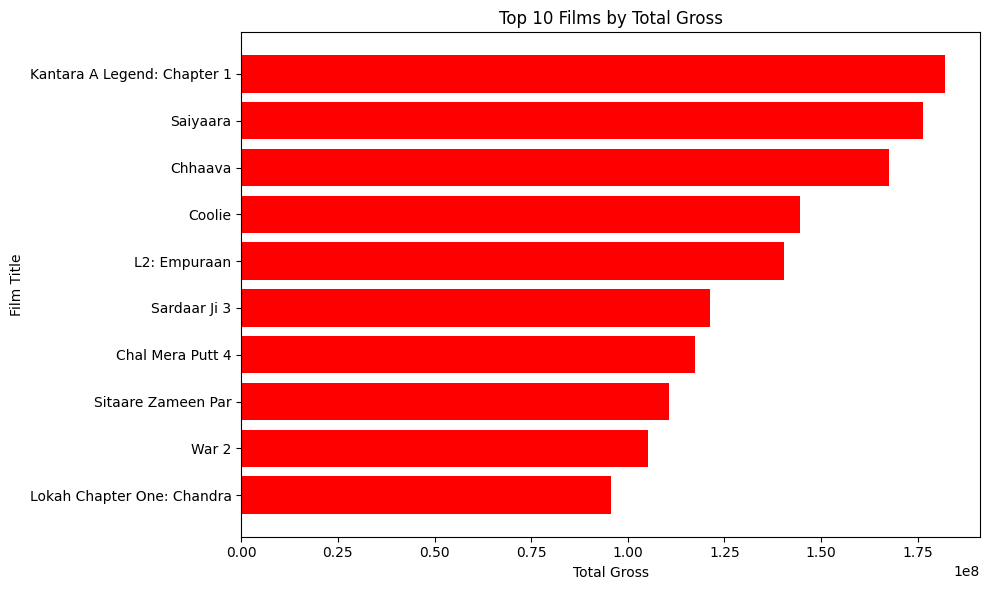

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.barh(top10['title'], top10['total_gross'], color='red')

plt.xlabel("Total Gross")
plt.ylabel("Film Title")
plt.title("Top 10 Films by Total Gross")

plt.gca().invert_yaxis()  # biggest film at top
plt.tight_layout()
plt.show()

In [ ]:
list(sales.columns)

['numero_film_id',
 'actual_sales_date',
 'state',
 'city',
 'theatre_name',
 'gross_today']

In [ ]:
sales[['actual_sales_date', 'gross_today']].head(10)

sales['gross_today'].isna().sum(), len(sales)

sales['gross_today'].describe()

count    4.696200e+04
mean     6.658301e+04
std      1.374425e+05
min      0.000000e+00
25%      7.470250e+03
50%      2.510000e+04
75%      6.993725e+04
max      4.022010e+06
Name: gross_today, dtype: float64

In [ ]:
sales['gross_today'] = pd.to_numeric(
    sales['gross_today'],
    errors='coerce'
)

In [ ]:
list(sales.columns)
sales.dtypes

numero_film_id         int64
actual_sales_date     object
state                 object
city                  object
theatre_name          object
gross_today          float64
dtype: object

In [ ]:
sales = flatten_sales_json(df_raw)
print("sales shape:", sales.shape)
sales.dtypes

sales shape: (65947, 6)


numero_film_id         int64
actual_sales_date     object
state                 object
city                  object
theatre_name          object
gross_today          float64
dtype: object

In [ ]:
import pandas as pd  # just in case

sales['actual_sales_date'] = pd.to_datetime(
    sales['actual_sales_date'],
    errors='coerce'
)

print(sales['actual_sales_date'].dtype)
sales[['actual_sales_date']].head()

datetime64[ns]


,actual_sales_date
0,2025-02-20
1,2025-02-21
2,2025-02-22
3,2025-02-23
4,2025-02-24


In [ ]:
sales['year_month'] = (
    sales['actual_sales_date']
      .dt.to_period('M')
      .astype(str)
)

sales[['actual_sales_date', 'year_month']].head()

,actual_sales_date,year_month
0,2025-02-20,2025-02
1,2025-02-21,2025-02
2,2025-02-22,2025-02
3,2025-02-23,2025-02
4,2025-02-24,2025-02


In [ ]:
monthly_gross = (
    sales
      .groupby('year_month', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'total_gross'})
      .sort_values('year_month')
)

monthly_gross.head()

,year_month,total_gross
0,2025-01,176090163.0
1,2025-02,264447842.0
2,2025-03,275733497.0
3,2025-04,280124422.0
4,2025-05,242751283.0


In [ ]:
best_month = monthly_gross.loc[monthly_gross['total_gross'].idxmax()]
worst_month = monthly_gross.loc[monthly_gross['total_gross'].idxmin()]

print("Highest month:", best_month['year_month'], "gross:", best_month['total_gross'])
print("Lowest month: ", worst_month['year_month'], "gross:", worst_month['total_gross'])

Highest month: 2025-08 gross: 592536648.0
Lowest month:  2025-11 gross: 44415346.0


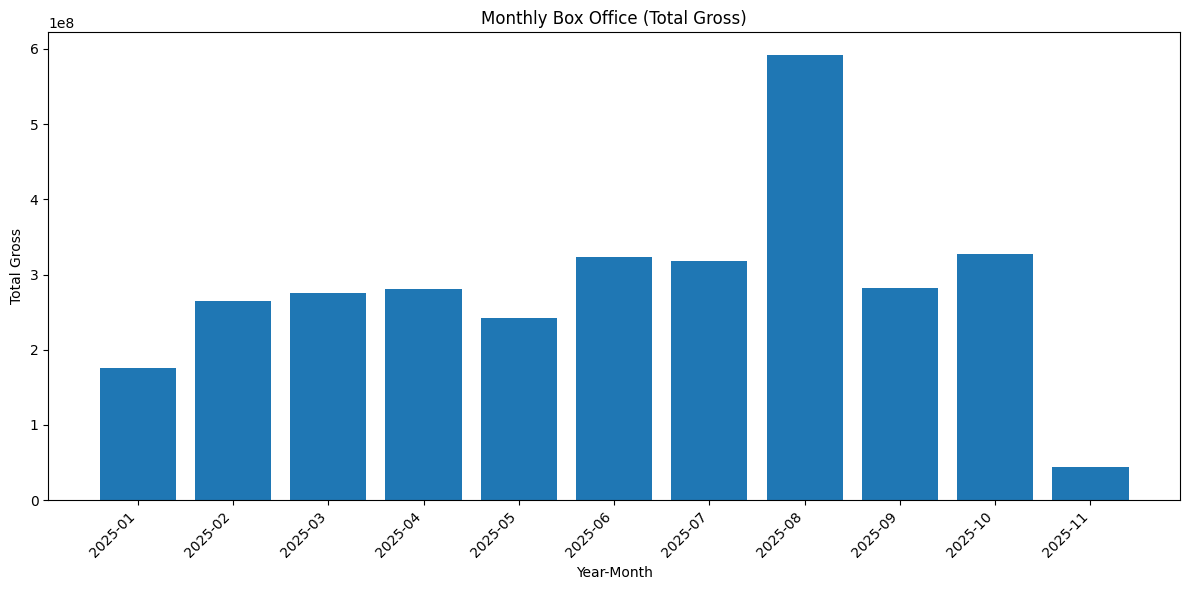

In [ ]:
plt.figure(figsize=(12, 6))

plt.bar(monthly_gross['year_month'], monthly_gross['total_gross'])

plt.xlabel("Year-Month")
plt.ylabel("Total Gross")
plt.title("Monthly Box Office (Total Gross)")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
top_films = (
    film_totals_with_titles
      .sort_values('total_gross', ascending=False)
      .head(5)
)

top_films[['numero_film_id', 'title', 'total_gross']]

,numero_film_id,title,total_gross
91,85118,Kantara A Legend: Chapter 1,182044184.0
68,82496,Saiyaara,176392024.0
30,76895,Chhaava,167509548.0
73,83671,Coolie,144641071.0
41,78916,L2: Empuraan,140466294.0


In [ ]:
target_id = int(top_films.iloc[0]['numero_film_id'])
target_title = top_films.iloc[0]['title']

print("Analysing film:", target_id, "-", target_title)

Analysing film: 85118 - Kantara A Legend: Chapter 1


In [ ]:
film_daily = (
    sales[sales['numero_film_id'] == target_id]
      .groupby('actual_sales_date', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'daily_gross'})
      .sort_values('actual_sales_date')
)

film_daily.head()

,actual_sales_date,daily_gross
0,2025-10-02,11490629.0
1,2025-10-03,16845123.0
2,2025-10-04,17033246.0
3,2025-10-05,16757161.0
4,2025-10-06,13442135.0


In [ ]:
first_date = film_daily['actual_sales_date'].min()
film_daily['days_since_start'] = (
    film_daily['actual_sales_date'] - first_date
).dt.days

film_daily.head()

,actual_sales_date,daily_gross,days_since_start
0,2025-10-02,11490629.0,0
1,2025-10-03,16845123.0,1
2,2025-10-04,17033246.0,2
3,2025-10-05,16757161.0,3
4,2025-10-06,13442135.0,4


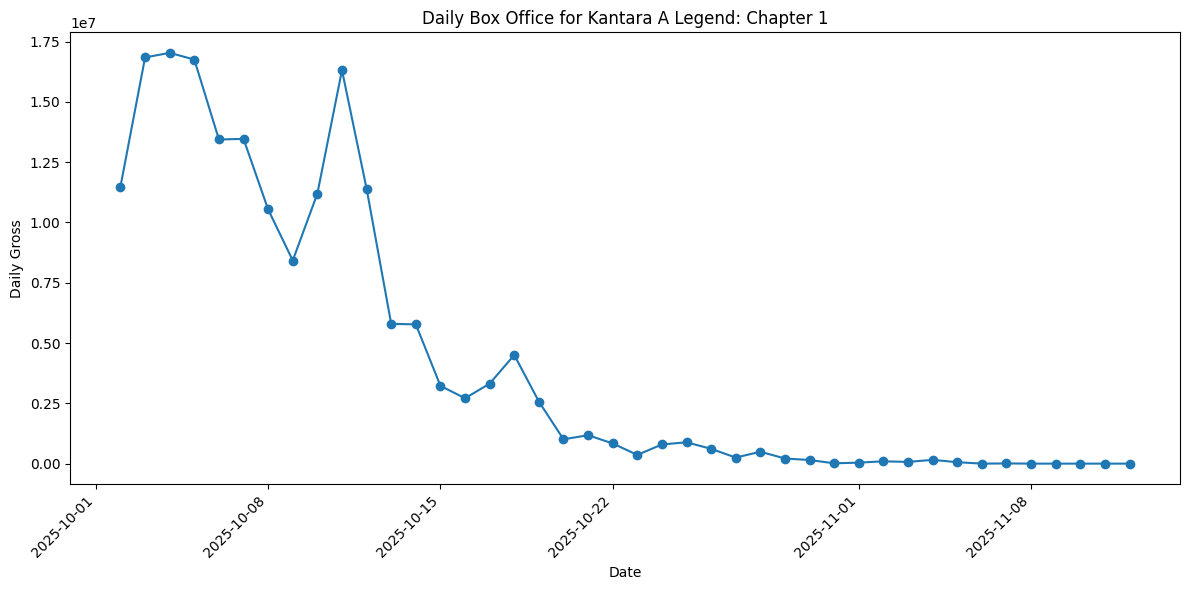

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(
    film_daily['actual_sales_date'],
    film_daily['daily_gross'],
    marker='o'
)

plt.xlabel("Date")
plt.ylabel("Daily Gross")
plt.title(f"Daily Box Office for {target_title}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
sales['actual_sales_date'] = pd.to_datetime(
    sales['actual_sales_date'],
    errors='coerce'
)

sales['gross_today'] = pd.to_numeric(
    sales['gross_today'],
    errors='coerce'
)

In [ ]:
sales['weekday'] = sales['actual_sales_date'].dt.day_name()     # "Monday", "Tuesday", ...
sales['weekday_index'] = sales['actual_sales_date'].dt.dayofweek  # Monday=0, Sunday=6

sales[['actual_sales_date', 'weekday', 'weekday_index']].head(10)

,actual_sales_date,weekday,weekday_index
0,2025-02-20,Thursday,3
1,2025-02-21,Friday,4
2,2025-02-22,Saturday,5
3,2025-02-23,Sunday,6
4,2025-02-24,Monday,0
5,2025-02-25,Tuesday,1
6,2025-02-26,Wednesday,2
7,2025-02-20,Thursday,3
8,2025-02-21,Friday,4
9,2025-02-22,Saturday,5


In [ ]:
weekday_totals = (
    sales
      .groupby(['weekday_index', 'weekday'], as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'total_gross'})
      .sort_values('weekday_index')
)

weekday_totals

,weekday_index,weekday,total_gross
0,0,Monday,274945156.0
1,1,Tuesday,303765330.0
2,2,Wednesday,185000743.0
3,3,Thursday,394554646.0
4,4,Friday,636121711.0
5,5,Saturday,768254709.0
6,6,Sunday,564228949.0


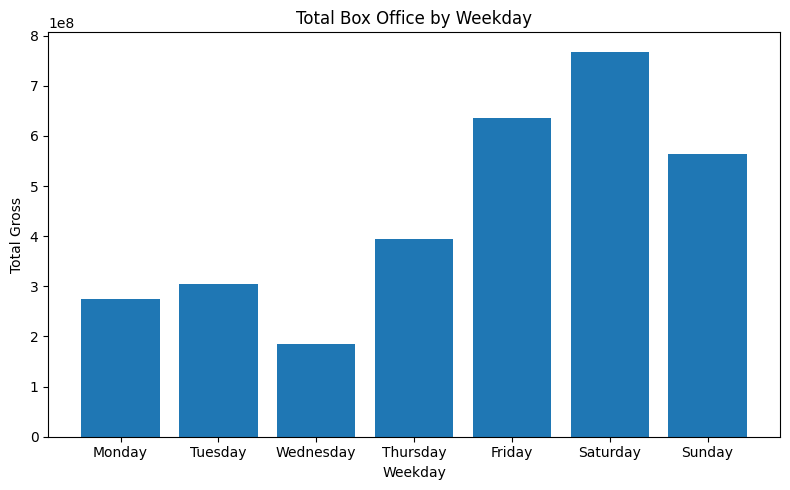

In [ ]:
plt.figure(figsize=(8, 5))

plt.bar(weekday_totals['weekday'], weekday_totals['total_gross'])

plt.xlabel("Weekday")
plt.ylabel("Total Gross")
plt.title("Total Box Office by Weekday")

plt.tight_layout()
plt.show()

In [ ]:
film_totals_with_titles.head()
film_totals_with_titles.columns

Index(['numero_film_id', 'total_gross', 'title'], dtype='object')

In [ ]:
indian_titles = pd.read_sql(
    """
    SELECT title, distributor
    FROM indian_titles;
    """,
    conn
)

indian_titles.head()

,title,distributor
0,Kantara A Legend: Chapter 1,Zstars Entertainment
1,Saiyaara,Mindblowing
2,Chhaava,Mindblowing
3,Coolie,Tolly Movies
4,L2: Empuraan,Cyber Systems


In [ ]:
films_with_dist = film_totals_with_titles.merge(
    indian_titles,
    on='title',
    how='left'
)

films_with_dist.head()

,numero_film_id,total_gross,title,distributor
0,48137,7163467.0,Noah's Ark,NaN
1,63815,6146995.0,Narivetta,Spectrum Talkies
2,64826,9748892.0,The Diplomat,Forum Distribution
3,66112,5045325.0,Bazooka,Wanderlust Films
4,68343,5383739.0,Emergency,Zee Studios


In [ ]:
dist_totals = (
    films_with_dist
      .dropna(subset=['distributor'])          # ignore films with no distributor
      .groupby('distributor', as_index=False)['total_gross']
      .sum()
      .rename(columns={'total_gross': 'dist_total_gross'})
      .sort_values('dist_total_gross', ascending=False)
)

dist_totals.head()

,distributor,dist_total_gross
3,Mindblowing,846236394.0
1,Forum Distribution,458183666.0
7,Tolly Movies,411821712.0
0,Cyber Systems,394466536.0
2,Home Screen Entertainment,215413384.0


In [ ]:
top_dists = dist_totals.head(10)
top_dists

,distributor,dist_total_gross
3,Mindblowing,846236394.0
1,Forum Distribution,458183666.0
7,Tolly Movies,411821712.0
0,Cyber Systems,394466536.0
2,Home Screen Entertainment,215413384.0
12,Zstars Entertainment,210804260.0
10,White Hill,165123939.0
4,Moviegoers Entertainment,145331031.0
9,Wanderlust Films,120813485.0
11,Zee Studios,65078800.0


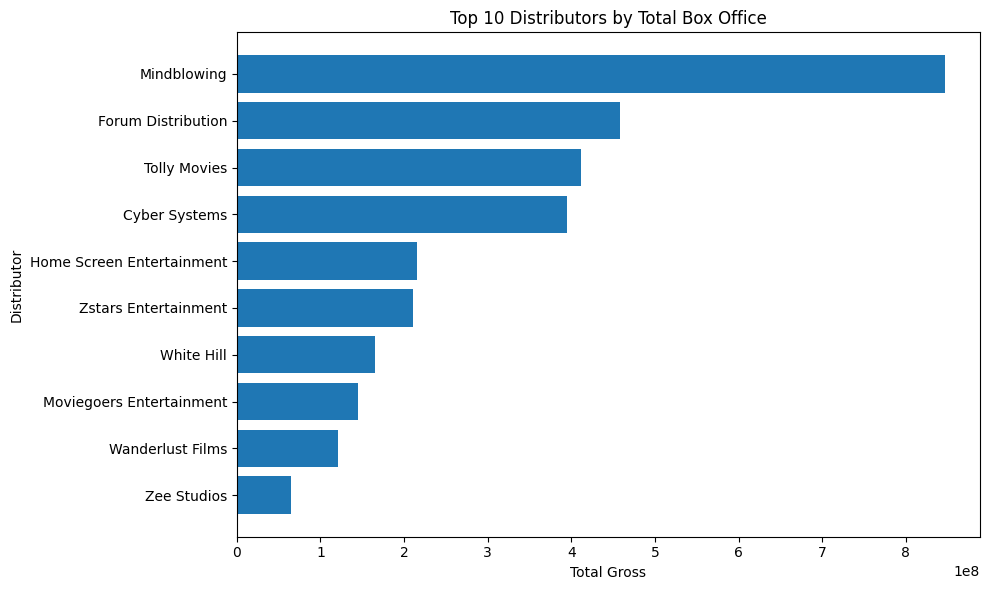

In [ ]:
plt.figure(figsize=(10, 6))

plt.barh(top_dists['distributor'], top_dists['dist_total_gross'])

plt.xlabel("Total Gross")
plt.ylabel("Distributor")
plt.title("Top 10 Distributors by Total Box Office")

plt.gca().invert_yaxis()   # biggest at top
plt.tight_layout()
plt.show()

I built this chart by aggregating daily gross to film-level totals, then joining film titles with their distributors and summing total gross per distributor. The chart shows that Mindblowing contributes the largest share of box office revenue, almost twice that of the next largest distributor, indicating a highly concentrated market where a few distributors dominate. I chose this chart because it directly answers a key business question—who our most valuable distributor partners are—and it uses the structure of the dataset correctly, aggregating from daily cinema-level sales up to distributor-level totals

## This Week Focus

In [ ]:
df_raw = pd.read_sql(
    "SELECT numero_film_id, raw_json FROM sales_raw_data;",
    conn
)

print("df_raw shape:", df_raw.shape)
df_raw.head()

df_raw shape: (100, 2)


,numero_film_id,raw_json
0,48137,"{""2025-02-20"": {""rows"": [{""boxOffice"": {""day1""..."
1,63815,"{""2025-05-22"": {""rows"": [{""boxOffice"": {""day1""..."
2,64826,"{""2025-03-13"": {""rows"": [{""boxOffice"": {""day1""..."
3,66112,"{""2025-04-10"": {""rows"": [{""boxOffice"": {""day1""..."
4,68343,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."


In [317]:
def flatten_one_film(raw_json_str, film_id):
    rows_out = []

    data = json.loads(raw_json_str)

    for week_start_str, week_content in data.items():
        try:
            week_dt = dt.datetime.strptime(week_start_str, "%Y-%m-%d").date()
        except Exception:
            continue

        rows = week_content.get("rows", [])
        if not isinstance(rows, list):
            continue

        for cinema_row in rows:
            if not isinstance(cinema_row, dict):
                continue

            state = cinema_row.get("state")
            city = cinema_row.get("city")
            theatre_name = cinema_row.get("theatre")

            box_office = cinema_row.get("boxOffice", {}) or {}
            if not isinstance(box_office, dict):
                continue

            for day_key, sales_data in box_office.items():
                if not isinstance(day_key, str) or not day_key.startswith("day"):
                    continue

                day_num_str = day_key.replace("day", "")
                if not day_num_str.isdigit():
                    continue

                day_offset = int(day_num_str) - 1
                actual_date = week_dt + dt.timedelta(days=day_offset)

                if not isinstance(sales_data, dict):
                    continue

                gross_today = sales_data.get("today")

                rows_out.append({
                    "numero_film_id": film_id,
                    "actual_sales_date": actual_date,
                    "state": state,
                    "city": city,
                    "theatre_name": theatre_name,
                    "gross_today": gross_today,
                })

    return pd.DataFrame(rows_out)

In [318]:
def flatten_sales_json(df_raw: pd.DataFrame) -> pd.DataFrame:
    """
    Loop over all films in df_raw, flatten each one
    using flatten_one_film, then concatenate the results.
    """
    all_frames = []

    for _, row in df_raw.iterrows():
        film_id = int(row['numero_film_id'])
        raw = row['raw_json']

        df_one = flatten_one_film(raw, film_id)

        if not df_one.empty:
            all_frames.append(df_one)

    if all_frames:
        result = pd.concat(all_frames, ignore_index=True)
    else:
        result = pd.DataFrame(
            columns=["numero_film_id", "actual_sales_date",
                     "state", "city", "theatre_name", "gross_today"]
        )

    return result

In [319]:
sales = flatten_sales_json(df_raw)
print("sales shape:", sales.shape)
sales.head()

sales['actual_sales_date'] = pd.to_datetime(sales['actual_sales_date'], errors='coerce')
sales['gross_today'] = pd.to_numeric(sales['gross_today'], errors='coerce')

sales.dtypes

sales shape: (65947, 6)


numero_film_id                int64
actual_sales_date    datetime64[ns]
state                        object
city                         object
theatre_name                 object
gross_today                 float64
dtype: object

In [320]:
state_totals = (
    sales
      .groupby('state', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'drill_down_state_gross'})
      .sort_values('drill_down_state_gross', ascending=False)
)

state_totals #1.22bil

,state,drill_down_state_gross
4,Victoria (inc TAS),1.219540e+09
0,New South Wales (inc ACT),9.987149e+08
2,Queensland,3.594744e+08
5,Western Australia,2.919676e+08
3,South Australia,2.320876e+08
1,Northern Territory,2.508670e+07


In [321]:
top_state = state_totals.iloc[0]['state']
print("Top state:", top_state)

Top state: Victoria (inc TAS)


In [322]:
state_sales = sales[sales['state'] == top_state]

city_totals = (
    state_sales
      .groupby('city', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'drill_down_city_gross'})
      .sort_values('drill_down_city_gross', ascending=False)
)

city_totals #473 mil

,city,drill_down_city_gross
19,West Melbourne,473075918.0
15,South East Melbourne,295602124.0
2,Central Inner Melbourne,120206842.0
10,North East Melbourne,100542920.0
13,Outer East Melbourne,92946142.0
11,North West Melbourne,49857710.0
4,Hobart,17722491.0
3,Geelong,15298760.0
7,Inner South Melbourne,10029801.0
9,Mornington Peninsula,9420997.0


In [323]:
top_city = city_totals.iloc[0]['city']
print("Top city in", top_state, ":", top_city)

Top city in Victoria (inc TAS) : West Melbourne


In [324]:
city_sales = state_sales[state_sales['city'] == top_city]

cinema_totals = (
    city_sales
      .groupby('theatre_name', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'cinema_gross'})
)

city_total_gross = cinema_totals['cinema_gross'].sum() #total
city_avg_gross = cinema_totals['cinema_gross'].mean() #avg


cinema_totals['share_of_city_pct'] = (
    cinema_totals['cinema_gross'] / city_total_gross * 100
)

cinema_totals['vs_city_avg_pct'] = (
    (cinema_totals['cinema_gross'] - city_avg_gross) / city_avg_gross * 100
) # % vs average cinema

cinema_totals = cinema_totals.sort_values('cinema_gross', ascending=False)

cinema_totals.head(10) #209 mil

,theatre_name,cinema_gross,share_of_city_pct,vs_city_avg_pct
3,Sunshine 20,209822774.0,44.352876,210.470130
5,Werribee 12,130211836.0,27.524512,92.671581
0,Highpoint 18,86432616.0,18.270348,27.892435
4,Watergardens 8,46104947.0,9.745782,-31.779527
1,Melton 5,401545.0,0.084880,-99.405843
2,Millers Junction 6,56100.0,0.011859,-99.916990
6,Yarraville Sun Theatre 8,46100.0,0.009745,-99.931787


In [325]:
cinema_global = (
    sales
      .groupby(['state', 'city', 'theatre_name'], as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'drill_up_whole_cinema_gross'})
      .sort_values('drill_up_whole_cinema_gross', ascending=False)
)

cinema_global.head(10) #272.38 million

,state,city,theatre_name,drill_up_whole_cinema_gross
68,New South Wales (inc ACT),West and Blue Mountains,Blacktown 10,272377817.0
202,Victoria (inc TAS),West Melbourne,Sunshine 20,209822774.0
54,New South Wales (inc ACT),Parramatta & Ryde,Parramatta 11,186267643.0
204,Victoria (inc TAS),West Melbourne,Werribee 12,130211836.0
216,Western Australia,Perth - South East,Carousel 14,127762193.0
190,Victoria (inc TAS),South East Melbourne,Chadstone 13,120959042.0
92,Queensland,Brisbane - South,Garden City Mt. Gravatt 16,117022392.0
192,Victoria (inc TAS),South East Melbourne,Fountain Gate 14,116249483.0
137,South Australia,Adelaide - West,Hoyts Arndale 8,100301966.0
147,Victoria (inc TAS),Central Inner Melbourne,Docklands 8,87963587.0


In [326]:
titles = pd.read_sql(
    "SELECT * FROM film_metadata;",
    conn
)

titles.head()

,numero_film_id,title
0,48137,Noah's Ark
1,63815,Narivetta
2,64826,The Diplomat
3,66112,Bazooka
4,68343,Emergency


In [328]:
dist_info = pd.read_sql(
    "SELECT title, distributor FROM indian_titles;",
    conn
)

dist_info

,title,distributor
0,Kantara A Legend: Chapter 1,Zstars Entertainment
1,Saiyaara,Mindblowing
2,Chhaava,Mindblowing
3,Coolie,Tolly Movies
4,L2: Empuraan,Cyber Systems
...,...,...
209,Andaaz 2,Mindblowing
210,Mithya,Zstars Entertainment
211,Apoorva Puthranmaar,Cyber Systems
212,Paradha,Tolly Movies


In [329]:
titles_with_dist = titles.merge(
    dist_info,
    on='title',
    how='left'
)

titles_with_dist.head()

,numero_film_id,title,distributor
0,48137,Noah's Ark,NaN
1,63815,Narivetta,Spectrum Talkies
2,64826,The Diplomat,Forum Distribution
3,66112,Bazooka,Wanderlust Films
4,68343,Emergency,Zee Studios


In [330]:
sales_with_dist = sales.merge(
    titles_with_dist[['numero_film_id', 'distributor']],
    on='numero_film_id',
    how='left'
)

sales_with_dist.head()

,numero_film_id,actual_sales_date,state,city,theatre_name,gross_today,distributor
0,48137,2025-02-20,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,9701.0,NaN
1,48137,2025-02-21,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,9952.0,NaN
2,48137,2025-02-22,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,63552.0,NaN
3,48137,2025-02-23,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,48450.0,NaN
4,48137,2025-02-24,New South Wales (inc ACT),Parramatta & Ryde,Macquarie 16,2200.0,NaN


In [331]:
dist_state = (
    sales_with_dist
      .groupby(['distributor', 'state'], as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'drill_down_dist_state_gross'})
      .sort_values(['distributor', 'drill_down_dist_state_gross'], ascending=[True, False])
)

dist_state.head(10)

,distributor,state,drill_down_dist_state_gross
4,Cyber Systems,Victoria (inc TAS),140023663.0
0,Cyber Systems,New South Wales (inc ACT),113151293.0
2,Cyber Systems,Queensland,64983508.0
5,Cyber Systems,Western Australia,45221007.0
3,Cyber Systems,South Australia,25244402.0
1,Cyber Systems,Northern Territory,5842663.0
10,Forum Distribution,Victoria (inc TAS),191452576.0
6,Forum Distribution,New South Wales (inc ACT),130901984.0
8,Forum Distribution,Queensland,50661608.0
9,Forum Distribution,South Australia,41378193.0


In [332]:
dist_totals = (
    sales_with_dist[~sales_with_dist['distributor'].isna()]
      .groupby('distributor', as_index=False)['gross_today']
      .sum()
      .rename(columns={'gross_today': 'gross_per_dis'})
      .sort_values('gross_per_dis', ascending=False)
)

dist_totals.head(5) #846 mil

,distributor,gross_per_dis
3,Mindblowing,846236394.0
1,Forum Distribution,458183666.0
7,Tolly Movies,411821712.0
0,Cyber Systems,394466536.0
2,Home Screen Entertainment,215413384.0


In [333]:
sales_with_dist['distributor'].isna().sum()

np.int64(2786)

In [334]:
sales_with_dist['distributor'].isna().mean()

np.float64(0.04224604606729646)

In [336]:
missing_ids = (
    sales_with_dist.loc[sales_with_dist['distributor'].isna(), 'numero_film_id']
    .drop_duplicates()
    .head(10)
)

missing_ids

0        48137
10129    76167
30793    79787
Name: numero_film_id, dtype: int64

In [337]:
pd.read_sql(
    f"SELECT numero_film_id, title FROM film_metadata "
    f"WHERE numero_film_id IN ({','.join(str(x) for x in missing_ids)})",
    conn
)

,numero_film_id,title
0,48137,Noah's Ark
1,76167,Nikka Zaildar 4
2,79787,HIT: The Third Case


In [338]:
for table in tables:
    df = pd.read_sql(f"PRAGMA table_info({table});", conn)
    print(table)
    display(df)

film_metadata


,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,title,TEXT,0,None,0


sales_raw_data


,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,raw_json,TEXT,0,None,0


indian_titles


,cid,name,type,notnull,dflt_value,pk
0,0,rank,INTEGER,0,None,0
1,1,title,TEXT,0,None,0
2,2,distributor,TEXT,0,None,0
3,3,release_date,TEXT,0,None,0
4,4,rating,TEXT,0,None,0
5,5,opening_screens,REAL,0,None,0
6,6,opening_screen_average,REAL,0,None,0
7,7,opening_weekend_total,REAL,0,None,0
8,8,opening_week_total,REAL,0,None,0
9,9,lifetime_total,REAL,0,None,0


In [339]:
df_raw = pd.read_sql("SELECT * FROM sales_raw_data LIMIT 1", conn)
sample = json.loads(df_raw['raw_json'][0])
sample

{'2025-02-20': {'rows': [{'boxOffice': {'day1': {'previousAdmissions': {},
      'today': 9701},
     'day2': {'previousAdmissions': {}, 'today': 9952, 'yesterday': 9701},
     'day3': {'previousAdmissions': {}, 'today': 63552, 'yesterday': 9952},
     'day4': {'previousAdmissions': {}, 'today': 48450, 'yesterday': 63552},
     'day5': {'previousAdmissions': {}, 'today': 2200, 'yesterday': 48450},
     'day6': {'previousAdmissions': {}, 'today': 6149, 'yesterday': 2200},
     'day7': {'previousAdmissions': {}, 'today': 6101, 'yesterday': 6149},
     'week': {'gross': 146105},
     'weekend': {'gross': 131655}},
    'circuit': 'Event',
    'circuitId': 4,
    'city': 'Parramatta & Ryde',
    'cityId': 246,
    'rank': 1,
    'region': 'Sydney',
    'regionId': 26,
    'release': {'cumulativeBoxOffice': 146105,
     'cumulativePaidAdmissions': 89,
     'thisWeekFilmCount': 24,
     'thisWeekRank': 13},
    'state': 'New South Wales (inc ACT)',
    'stateId': 2,
    'theatre': 'Macquarie 

In [340]:
records = []

for raw in df_raw['raw_json']:
    data = json.loads(raw)

    for date_key, content in data.items():
        for r in content.get('rows', []):
            box = r.get('boxOffice', {})
            w = box.get('week', {})
            
            records.append({
                'date': date_key,
                'theatre': r.get('theatre'),
                'city': r.get('city'),
                'region': r.get('region'),
                'state': r.get('state'),
                'week_gross': w.get('gross')
            })

flat = pd.DataFrame(records)
flat.head()

,date,theatre,city,region,state,week_gross
0,2025-02-20,Macquarie 16,Parramatta & Ryde,Sydney,New South Wales (inc ACT),146105.0
1,2025-02-20,Southland 16,Inner South Melbourne,Melbourne,Victoria (inc TAS),139544.0
2,2025-02-20,Sunshine 20,West Melbourne,Melbourne,Victoria (inc TAS),138381.0
3,2025-02-20,Fountain Gate 14,South East Melbourne,Melbourne,Victoria (inc TAS),90367.0
4,2025-02-20,Highpoint 18,West Melbourne,Melbourne,Victoria (inc TAS),89893.0


In [341]:
flat['date'].value_counts().sort_index()

date
2025-02-20    111
2025-02-27     83
2025-03-06     25
2025-03-13     13
2025-03-20      5
2025-03-27      3
2025-04-03      1
2025-04-10      4
2025-04-17      1
2025-08-14      1
Name: count, dtype: int64

In [342]:
flat['date'] = pd.to_datetime(flat['date'])

In [343]:
flat['year_week'] = flat['date'].dt.isocalendar().week
flat['year'] = flat['date'].dt.isocalendar().year

In [344]:
flat['year_week_id'] = flat['year'].astype(str) + '-W' + flat['year_week'].astype(str)

In [345]:
weekly = (
    flat.groupby(['theatre', 'city', 'region', 'state', 'year_week_id'])
        ['week_gross']
        .sum()
        .reset_index()
)
weekly

,theatre,city,region,state,year_week_id,week_gross
0,Airport West 8,North West Melbourne,Melbourne,Victoria (inc TAS),2025-W8,48504.0
1,Airport West 8,North West Melbourne,Melbourne,Victoria (inc TAS),2025-W9,5000.0
2,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W10,19900.0
3,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W11,20000.0
4,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W12,9200.0
...,...,...,...,...,...,...
242,Wodonga Bandiana Army Cinema 1,Hume,VIC Regional,Victoria (inc TAS),2025-W15,0.0
243,Yarraville Sun Theatre 8,West Melbourne,Melbourne,Victoria (inc TAS),2025-W8,46100.0
244,Yarraville Sun Theatre 8,West Melbourne,Melbourne,Victoria (inc TAS),2025-W9,0.0
245,Yeppoon Cinemas 6,Central Queensland,QLD Regional,Queensland,2025-W8,44640.0


In [346]:
weekly['year_week_id'].value_counts().sort_index()

year_week_id
2025-W10     25
2025-W11     13
2025-W12      5
2025-W13      3
2025-W14      1
2025-W15      4
2025-W16      1
2025-W33      1
2025-W8     111
2025-W9      83
Name: count, dtype: int64

In [347]:
weekly.groupby('theatre')['year_week_id'].nunique().sort_values(ascending=False)

theatre
Boronia Metro 4                   5
Rockingham United 6               5
Hawthorne 4                       4
Cowes Cultural Centre 1           4
Rockingham 10                     4
                                 ..
Warrawong 6                       1
Warriewood United 7               1
Wickham Picture Gardens 1         1
Wodonga Bandiana Army Cinema 1    1
Woden 8                           1
Name: year_week_id, Length: 124, dtype: int64

In [348]:
valid_theatres = weekly.groupby('theatre')['year_week_id'] \
                       .nunique() \
                       .loc[lambda x: x >= 3] \
                       .index

weekly_filtered = weekly[weekly['theatre'].isin(valid_theatres)]
weekly_filtered

,theatre,city,region,state,year_week_id,week_gross
2,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W10,19900.0
3,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W11,20000.0
4,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),2025-W12,9200.0
17,Boronia Metro 4,Outer East Melbourne,Melbourne,Victoria (inc TAS),2025-W10,29300.0
18,Boronia Metro 4,Outer East Melbourne,Melbourne,Victoria (inc TAS),2025-W11,20900.0
...,...,...,...,...,...,...
205,Sunshine 20,West Melbourne,Melbourne,Victoria (inc TAS),2025-W9,3400.0
222,Victoria Point 8,Brisbane - East,Brisbane,Queensland,2025-W10,5400.0
223,Victoria Point 8,Brisbane - East,Brisbane,Queensland,2025-W11,24800.0
224,Victoria Point 8,Brisbane - East,Brisbane,Queensland,2025-W8,56201.0


In [349]:
stats = (
    weekly_filtered
        .groupby(['theatre', 'city', 'region', 'state'])
        ['week_gross']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)

stats['cv'] = stats['std'] / stats['mean']
stats.head()

,theatre,city,region,state,mean,std,count,cv
0,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),16366.666667,6206.716792,3,0.379229
1,Boronia Metro 4,Outer East Melbourne,Melbourne,Victoria (inc TAS),20780.000000,7483.782466,5,0.360144
2,Carousel 14,Perth - South East,Perth,Western Australia,48948.333333,25827.323019,3,0.527645
3,Cowes Cultural Centre 1,Latrobe - Gippsland,VIC Regional,Victoria (inc TAS),20475.000000,14692.259867,4,0.717571
4,Esperance Fenwick Cinema 3,W.A - Outback South,WA Regional,Western Australia,26200.000000,22782.449385,3,0.869559


In [351]:
stats = (
    weekly_filtered
        .groupby(['theatre', 'city', 'region', 'state'])
        ['week_gross']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)

stats['cv'] = stats['std'] / stats['mean']
stats

,theatre,city,region,state,mean,std,count,cv
0,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),16366.666667,6206.716792,3,0.379229
1,Boronia Metro 4,Outer East Melbourne,Melbourne,Victoria (inc TAS),20780.000000,7483.782466,5,0.360144
2,Carousel 14,Perth - South East,Perth,Western Australia,48948.333333,25827.323019,3,0.527645
3,Cowes Cultural Centre 1,Latrobe - Gippsland,VIC Regional,Victoria (inc TAS),20475.000000,14692.259867,4,0.717571
4,Esperance Fenwick Cinema 3,W.A - Outback South,WA Regional,Western Australia,26200.000000,22782.449385,3,0.869559
5,Garden City Mt. Gravatt 16,Brisbane - South,Brisbane,Queensland,59371.333333,24892.259848,3,0.419264
6,Gladstone Cinema 7,Central Queensland,QLD Regional,Queensland,24286.666667,21186.885881,3,0.872367
7,Hawthorne 4,Brisbane - Inner City,Brisbane,Queensland,23475.000000,10500.912659,4,0.447323
8,Horsham Centre Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),16966.666667,9354.321639,3,0.551335
9,Knox 15,Outer East Melbourne,Melbourne,Victoria (inc TAS),34675.666667,19415.699455,3,0.559923


In [352]:
def classify(cv):
    if cv < 0.30:
        return 'Safer (Stable)'
    elif cv < 0.60:
        return 'Moderate'
    elif cv < 1.00:
        return 'Higher-Risk (Volatile)'
    else:
        return 'Highly Volatile'

stats['risk_category'] = stats['cv'].apply(classify)

In [353]:
stats.sort_values('cv')

,theatre,city,region,state,mean,std,count,cv,risk_category
13,Redbank 8,Ipswich Region,QLD Regional,Queensland,40026.250000,8782.240693,4,0.219412,Safer (Stable)
1,Boronia Metro 4,Outer East Melbourne,Melbourne,Victoria (inc TAS),20780.000000,7483.782466,5,0.360144,Moderate
0,Ararat Astor Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),16366.666667,6206.716792,3,0.379229,Moderate
5,Garden City Mt. Gravatt 16,Brisbane - South,Brisbane,Queensland,59371.333333,24892.259848,3,0.419264,Moderate
17,Stafford 10,Brisbane - North,Brisbane,Queensland,26899.000000,11394.327580,3,0.423597,Moderate
7,Hawthorne 4,Brisbane - Inner City,Brisbane,Queensland,23475.000000,10500.912659,4,0.447323,Moderate
14,Rockingham 10,Perth - South West,Perth,Western Australia,45550.000000,22322.111609,4,0.490057,Moderate
2,Carousel 14,Perth - South East,Perth,Western Australia,48948.333333,25827.323019,3,0.527645,Moderate
8,Horsham Centre Cinema 3,North West Victoria,VIC Regional,Victoria (inc TAS),16966.666667,9354.321639,3,0.551335,Moderate
9,Knox 15,Outer East Melbourne,Melbourne,Victoria (inc TAS),34675.666667,19415.699455,3,0.559923,Moderate


In [ ]:
stats.head()
stats.columns

Index(['theatre', 'city', 'region', 'state', 'mean', 'std', 'count', 'cv',
       'risk_category'],
      dtype='object')

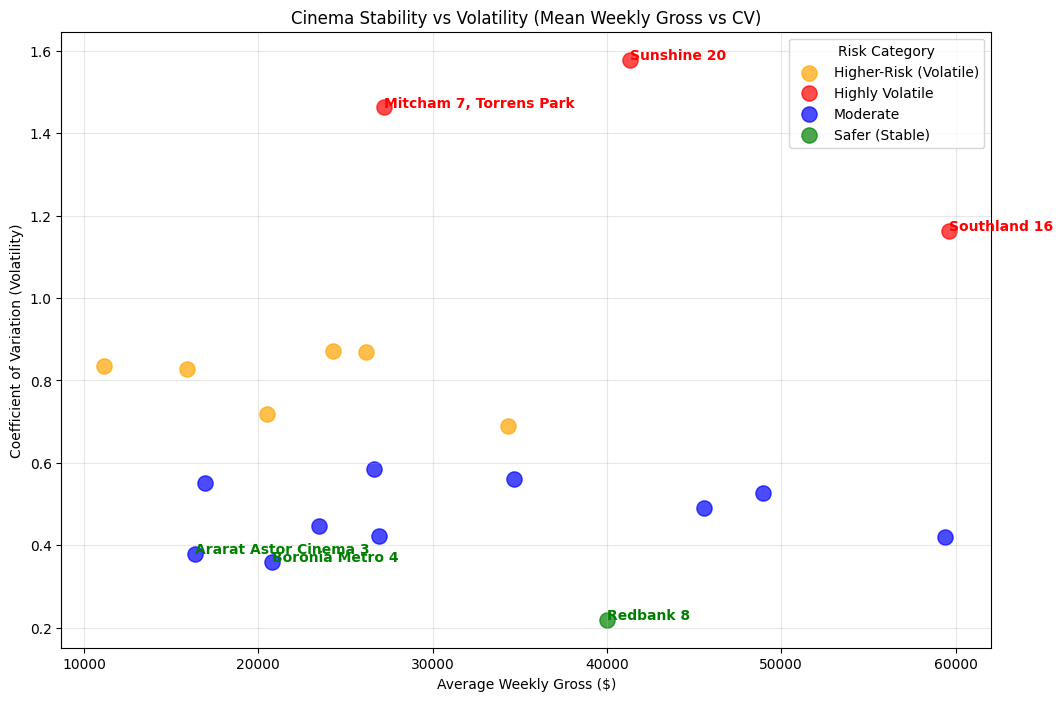

In [356]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Assign a color to each risk category
color_map = {
    'Safer (Stable)': 'green',
    'Moderate': 'blue',
    'Higher-Risk (Volatile)': 'orange',
    'Highly Volatile': 'red'
}

# Plot each category separately
for category, group in stats.groupby('risk_category'):
    plt.scatter(
        group['mean'],
        group['cv'],
        label=category,
        color=color_map.get(category, 'grey'),
        s=120,
        alpha=0.7
    )

# --- Label extreme points ---

# 3 lowest CV (most stable)
stable_points = stats.nsmallest(3, 'cv')

# 3 highest CV (most volatile)
volatile_points = stats.nlargest(3, 'cv')

for _, row in stable_points.iterrows():
    plt.text(
        row['mean'], row['cv'],
        row['theatre'],
        fontsize=10, fontweight='bold',
        color='green'
    )

for _, row in volatile_points.iterrows():
    plt.text(
        row['mean'], row['cv'],
        row['theatre'],
        fontsize=10, fontweight='bold',
        color='red'
    )

plt.title('Cinema Stability vs Volatility (Mean Weekly Gross vs CV)')
plt.xlabel('Average Weekly Gross ($)')
plt.ylabel('Coefficient of Variation (Volatility)')
plt.grid(alpha=0.3)
plt.legend(title='Risk Category')

plt.show()

In [361]:
weekly_plot = weekly_filtered.merge(
    stats[['theatre', 'risk_category']],
    on='theatre',
    how='left'
)

C:\Users\khanh\AppData\Local\Temp\ipykernel_15008\2828661379.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


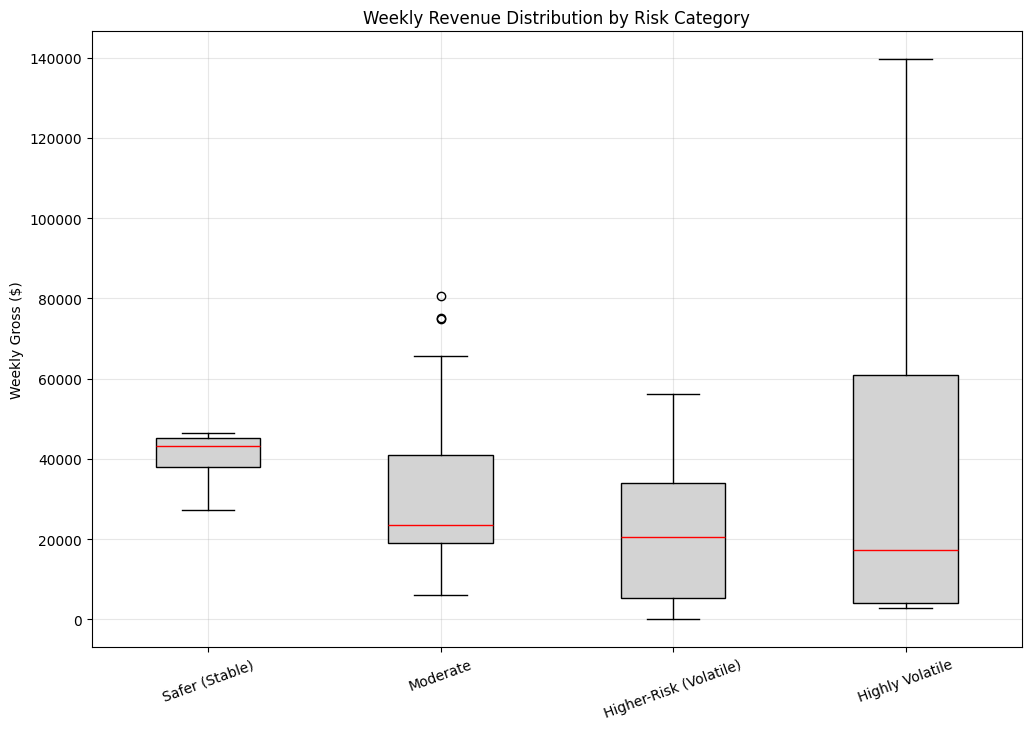

In [362]:
plt.figure(figsize=(12, 8))

# Get risk categories in a controlled order
categories = ['Safer (Stable)', 'Moderate', 'Higher-Risk (Volatile)', 'Highly Volatile']
data_to_plot = []

for cat in categories:
    values = weekly_plot.loc[weekly_plot['risk_category'] == cat, 'week_gross']
    if len(values) > 0:
        data_to_plot.append(values)
    else:
        data_to_plot.append([None])  # placeholder for empty groups

# Create the boxplot
plt.boxplot(
    data_to_plot,
    labels=categories,
    patch_artist=True,
    boxprops=dict(facecolor='lightgray'),
    medianprops=dict(color='red'),
    showfliers=True
)

plt.title('Weekly Revenue Distribution by Risk Category')
plt.ylabel('Weekly Gross ($)')
plt.grid(alpha=0.3)
plt.xticks(rotation=20)
plt.show()

In [364]:
region_stats = (
    weekly_filtered
        .groupby(['region'])
        ['week_gross']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)

region_stats['cv'] = region_stats['std'] / region_stats['mean']
region_stats

,region,mean,std,count,cv
0,Adelaide,27232.333333,39828.571909,3,1.462547
1,Brisbane,35000.857143,21523.291966,14,0.614936
2,Melbourne,36800.000000,43332.425797,15,1.177512
3,Perth,38528.750000,21384.646825,12,0.555031
4,QLD Regional,33280.714286,16092.644321,7,0.483543
5,Sydney,11133.666667,9304.987928,3,0.835752
6,VIC Regional,17536.285714,10627.793717,14,0.606046
7,WA Regional,26200.000000,22782.449385,3,0.869559


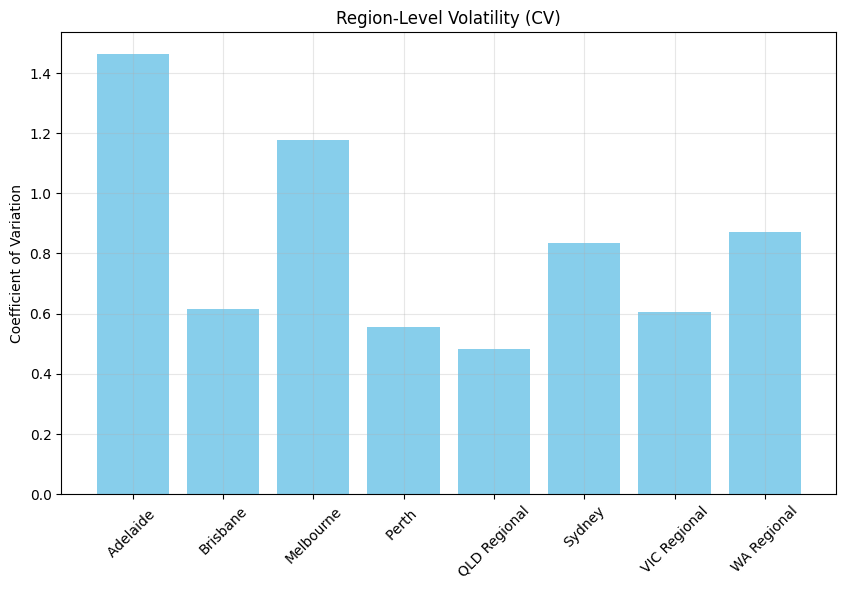

In [365]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(region_stats['region'], region_stats['cv'], color='skyblue')
plt.title('Region-Level Volatility (CV)')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

In [368]:
city_stats = (
    weekly_filtered
        .groupby(['city'])
        ['week_gross']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)

city_stats['cv'] = city_stats['std'] / city_stats['mean']

# Sort by CV (high to low)
city_stats_sorted = city_stats.sort_values('cv', ascending=False)
city_stats_sorted

,city,mean,std,count,cv
15,West Melbourne,41295.750000,65178.177567,4,1.578327
0,Adelaide - South,27232.333333,39828.571909,3,1.462547
6,Inner South Melbourne,59630.000000,69368.661310,3,1.163318
5,Central Queensland,24286.666667,21186.885881,3,0.872367
14,W.A - Outback South,26200.000000,22782.449385,3,0.869559
13,South West Sydney,11133.666667,9304.987928,3,0.835752
8,Latrobe - Gippsland,18188.500000,13135.644886,8,0.722195
1,Brisbane - East,34325.250000,23669.046247,4,0.689552
12,Perth - South West,35055.555556,20192.703578,9,0.576020
10,Outer East Melbourne,25990.875000,13835.821422,8,0.532334


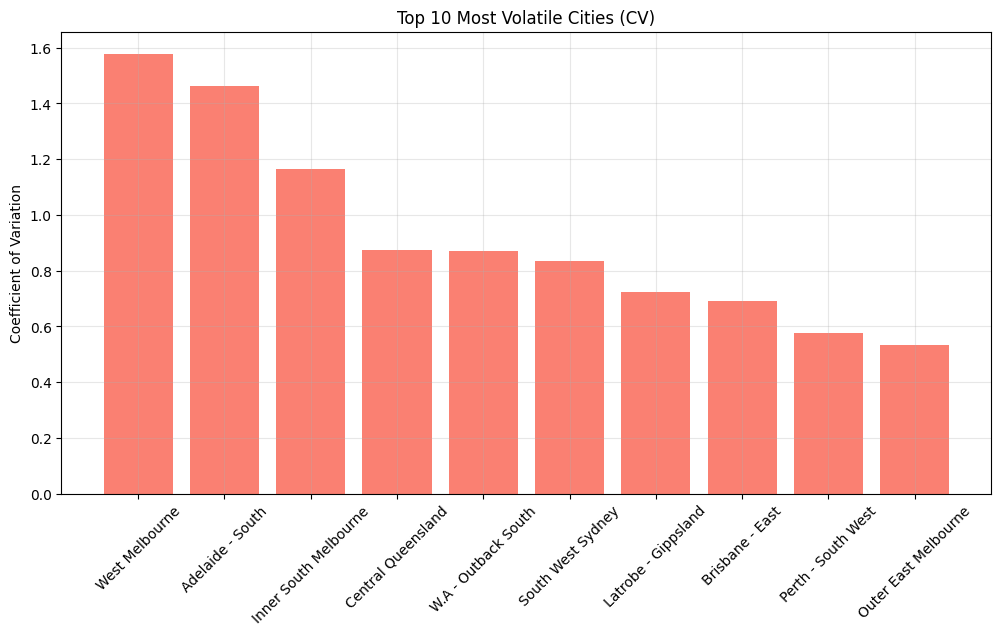

In [369]:
top10 = city_stats_sorted.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10['city'], top10['cv'], color='salmon')
plt.title('Top 10 Most Volatile Cities (CV)')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

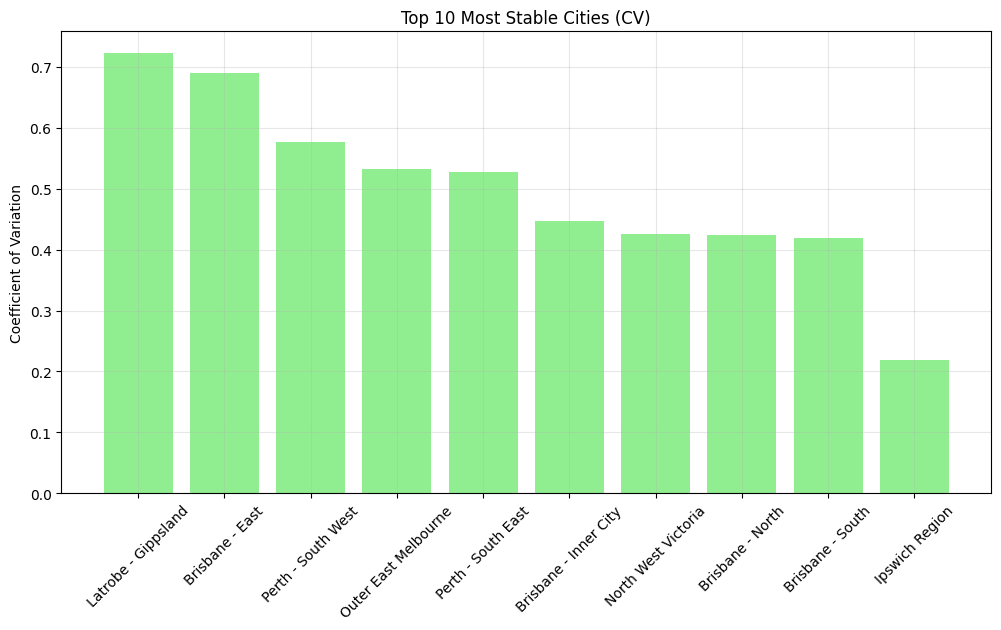

In [370]:
bottom10 = city_stats_sorted.tail(10)

plt.figure(figsize=(12, 6))
plt.bar(bottom10['city'], bottom10['cv'], color='lightgreen')
plt.title('Top 10 Most Stable Cities (CV)')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

In [380]:
import numpy as np

In [381]:
region_city_stats = (
    weekly_filtered
        .groupby(['region', 'city'])
        ['week_gross']
        .agg(['mean', 'std', 'count'])
        .reset_index()
)

region_city_stats['cv'] = region_city_stats['std'] / region_city_stats['mean']

# (optional but sensible) keep only region–city combos with at least 3 weeks of data
region_city_stats = region_city_stats[region_city_stats['count'] >= 3]

region_city_stats.head()

,region,city,mean,std,count,cv
0,Adelaide,Adelaide - South,27232.333333,39828.571909,3,1.462547
1,Brisbane,Brisbane - East,34325.250000,23669.046247,4,0.689552
2,Brisbane,Brisbane - Inner City,23475.000000,10500.912659,4,0.447323
3,Brisbane,Brisbane - North,26899.000000,11394.327580,3,0.423597
4,Brisbane,Brisbane - South,59371.333333,24892.259848,3,0.419264
